In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)

In [2]:
# Load Training data
train_data = pd.read_csv('F:/Data Analysis/Python/CreditTransactionFraudDetection/EDA/fraudTrain.csv',low_memory=False, index_col= 0) 

# Load Testing data
test_data = pd.read_csv('F:/Data Analysis/Python/CreditTransactionFraudDetection/EDA/fraudTest.csv',low_memory=False, index_col= 0) 

In [3]:
df = pd.concat([train_data, test_data],ignore_index=True)

In [4]:
df.shape

(1852394, 22)

In [5]:
df.is_fraud.value_counts()

is_fraud
0    1842743
1       9651
Name: count, dtype: int64

In [6]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [7]:
print(f"(Rows, Columns): {df.shape}\n")

(Rows, Columns): (1852394, 22)



In [8]:
print(f"Data Types: {df.dtypes}\n")

Data Types: trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object



In [9]:
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])
df["dob"] = pd.to_datetime(df["dob"])
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [10]:
df = df.drop(['cc_num','trans_num'],axis=1)

In [11]:
df.head()

,trans_date_trans_time,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,1325376186,38.674999,-78.632459,0


In [32]:
def dataframe_summary(df):
    
    print("\nDataFrame Summary")
    print("=" * 50)
    
    print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns\n")
    print("Data Types:\n", df.dtypes, "\n")
    
    missing_values = df.isnull().sum()
    print("Missing Values:\n", missing_values[missing_values > 0] if missing_values.sum() > 0 else "There are no missing values.", "\n")
    
    if(len(df)==len(df.drop_duplicates()) == True):
        print("There are no duplicate values.\n")
    else:
        print("There are duplicate values.\n")
    
    print("Statistics:\n", df.describe().T, "\n")
    print("Unique Values:\n", df.nunique(), "\n")
    print("Memory Usage:\n", df.memory_usage(deep=True), "\n")
    print("Sample Data:\n", df.head(), "\n")
    
    print("=" * 50)


In [31]:
dataframe_summary(df)


DataFrame Summary
Shape: 1852394 rows, 24 columns

Data Types:
 trans_date_trans_time    datetime64[ns]
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                      datetime64[ns]
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
age                               int32
hour                              int32
day                               int32
month          

In [14]:
df['amt'].describe()

count    1.852394e+06
mean     7.006357e+01
std      1.592540e+02
min      1.000000e+00
25%      9.640000e+00
50%      4.745000e+01
75%      8.310000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [15]:
np.percentile(df['amt'],99)

537.9

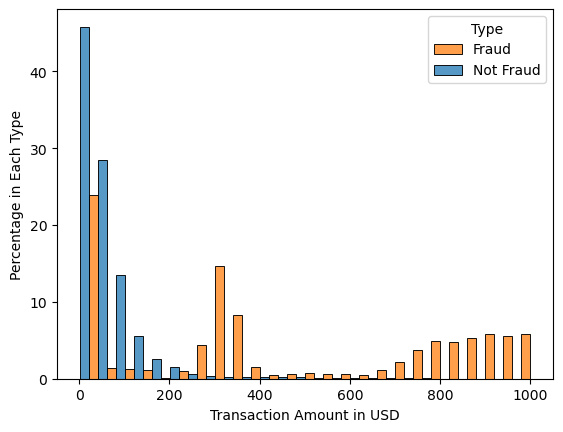

In [16]:
#amount vs fraud
import seaborn as sns
ax=sns.histplot(x='amt',data=df[df.amt<=1000],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

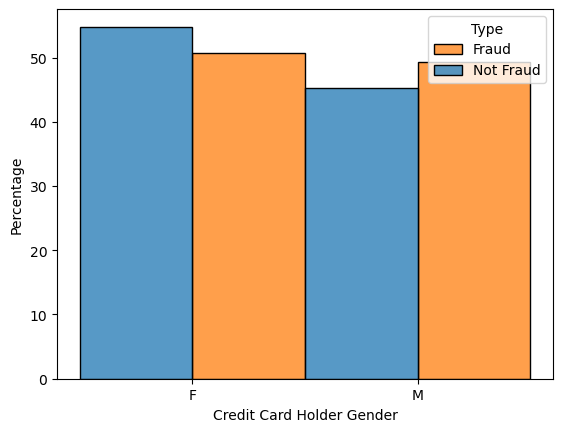

In [17]:
#Gender vs Fraud
ax=sns.histplot(x='gender',data=df, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

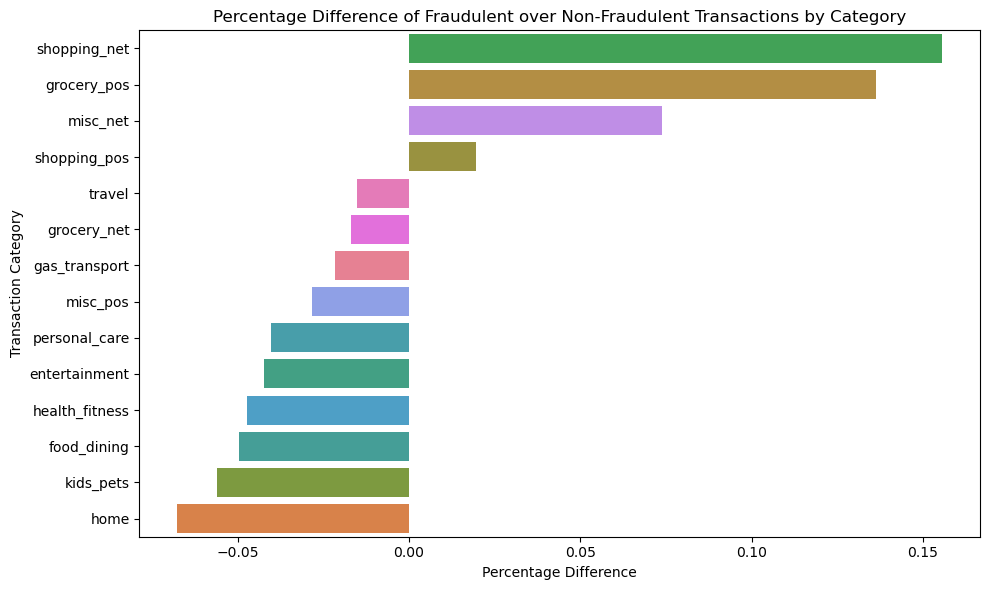

In [18]:
#calculate the percentage difference
a=df[df['is_fraud']==0]['category'].value_counts(normalize=True).to_frame().reset_index()
a.columns=['category','not fraud percentage']

b=df[df['is_fraud']==1]['category'].value_counts(normalize=True).to_frame().reset_index()
b.columns=['category','fraud percentage']

ab=a.merge(b,on='category')
ab['diff']=ab['fraud percentage']-ab['not fraud percentage']

unique_categories = ab['category'].unique()
palette = sns.color_palette("husl", len(unique_categories))

color_dict = dict(zip(unique_categories, palette))

plt.figure(figsize=(10, 6))
ax = sns.barplot(y='category', x='diff', data=ab.sort_values('diff', ascending=False), 
                 palette=[color_dict[cat] for cat in ab.sort_values('diff', ascending=False)['category']])

ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('Percentage Difference of Fraudulent over Non-Fraudulent Transactions by Category')

plt.tight_layout()
plt.show()

In [19]:
df.dtypes

trans_date_trans_time    datetime64[ns]
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                      datetime64[ns]
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
dtype: object

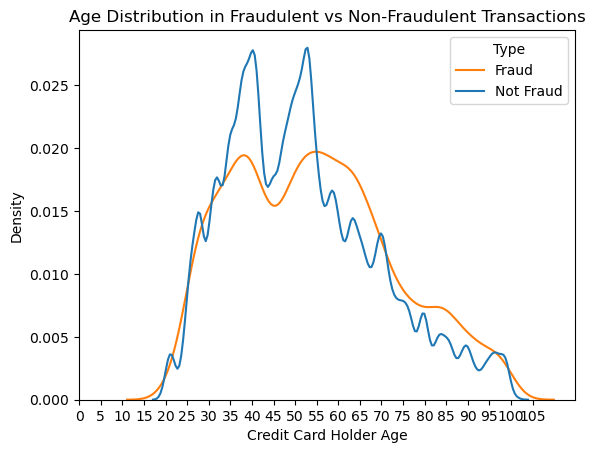

In [20]:
#age vs fraud
import datetime as dt
df['age']=dt.date.today().year-pd.to_datetime(df['dob']).dt.year
ax=sns.kdeplot(x='age',data=df, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

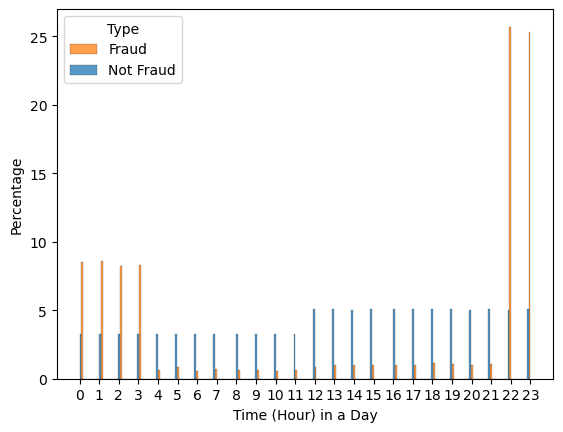

In [21]:
#time in a day vs fraud
df['hour']=pd.to_datetime(df['trans_date_trans_time']).dt.hour
ax=sns.histplot(data=df, x="hour", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Time (Hour) in a Day')
plt.xticks(np.arange(0,24,1))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

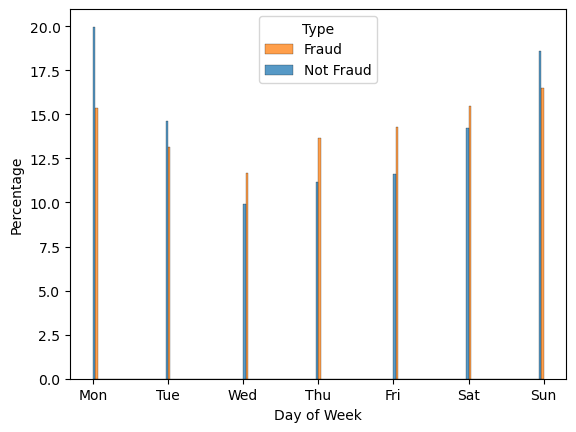

In [22]:
#day of week vs fraud
df['day']=pd.to_datetime(df['trans_date_trans_time']).dt.dayofweek
ax=sns.histplot(data=df, x="day", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
ax.set_ylabel('Percentage')
ax.set_xlabel('Day of Week')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

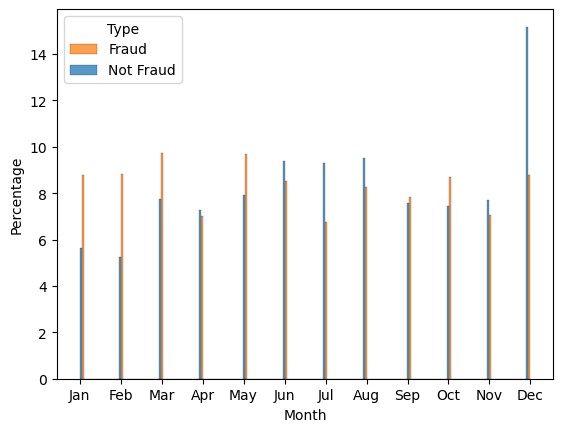

In [23]:
#month vs fraud
df['month']=pd.to_datetime(df['trans_date_trans_time']).dt.month
ax=sns.histplot(data=df, x="month", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Month')
plt.xticks(np.arange(1,13,1))
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

In [24]:
df.shape

(1852394, 24)

In [33]:
df.is_fraud.value_counts()

is_fraud
0    1842743
1       9651
Name: count, dtype: int64

In [41]:
if 'kids_pets' in df['category'].values:
    fraud_counts = df[df['category'] == 'kids_pets']['is_fraud'].value_counts()
    print(fraud_counts)

is_fraud
0    161423
1       304
Name: count, dtype: int64


In [47]:
if 23 in df['hour'].values:
    fraud_counts = df[df['hour'] == 23]['is_fraud'].value_counts()
    print(fraud_counts)

is_fraud
0    93460
1     2442
Name: count, dtype: int64


In [50]:
if 'M' in df['gender'].values and 'grocery_pos' in df['category'].values:
    fraud_counts = df[(df['gender'] == 'M') & (df['category'] == 'grocery_pos')]['is_fraud'].value_counts()
    print(fraud_counts)

is_fraud
0    81716
1     1236
Name: count, dtype: int64


In [25]:
df.to_csv('F:/Data Analysis/Python/CreditTransactionFraudDetection/EDA/processed_fraud_data.csv', index=False)

In [44]:
df

,trans_date_trans_time,merchant,category,amt,first,last,gender,street,city,state,...,job,dob,unix_time,merch_lat,merch_long,is_fraud,age,hour,day,month
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0,37,0,1,1
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0,47,0,1,1
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0,63,0,1,1
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,Patent attorney,1967-01-12,1325376076,47.034331,-112.561071,0,58,0,1,1
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,Dance movement psychotherapist,1986-03-28,1325376186,38.674999,-78.632459,0,39,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,...,Town planner,1966-02-13,1388534347,39.946837,-91.333331,0,59,23,3,12
1852390,2020-12-31 23:59:09,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,...,Futures trader,1999-12-27,1388534349,29.661049,-96.186633,0,26,23,3,12
1852391,2020-12-31 23:59:15,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,...,Musician,1981-11-29,1388534355,46.658340,-119.715054,0,44,23,3,12
1852392,2020-12-31 23:59:24,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,...,Cartographer,1965-12-15,1388534364,44.470525,-117.080888,0,60,23,3,12
